# Problem Set #4
MACS 30100 Dr. Evans  
Xiuyuan Zhang

## Question 1: Multiple Linear Regression

### (a) Import Data, and Identify and Replace Missing Values

In [89]:
# import python libraries
import pandas as pd
import numpy as np
import sklearn as sk
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import scipy


In [25]:
# import data
# looking at the data, missing values are represented by "?"
data_auto = pd.read_csv("auto.csv", na_values = "?")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### (b) Produce a Scatterplot of all Quantitative Variables

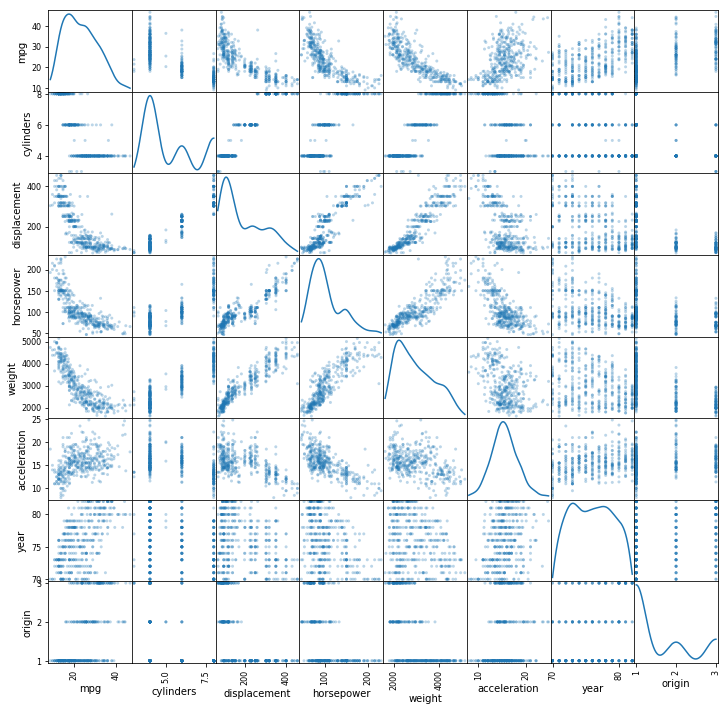

In [29]:
%matplotlib inline

scatter_matrix(data_auto, alpha=0.3, figsize=(12, 12), diagonal='kde')
print()

### (c) Compute the Correlation Matrix

In [30]:
data_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### (d) Estimate the Following Multiple Linear Regression Model of mpg on all other Quantitative Variables


In [34]:
data_auto["constant"] = 1
regression_mpg = sm.OLS(endog = data_auto.mpg, exog = data_auto[['constant', 'cylinders', 'displacement',
                                                             'horsepower', 'weight', 'acceleration',
                                                             'year', 'origin']], missing = 'drop')
results_mpg = regression_mpg.fit()
print(results_mpg.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        09:46:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

**i.** the coefficients for $displacement$, $weight$, $year$, and $origin$ are statistically significant at the 1% level.  

**ii.** the coefficients for $cylinders$, $horsepower$, and $acceleration$ are not statistically significant at the 10% level.  

**iii.** The estimated coefficient $\beta_6$ for year is about 0.75. This suggests that an increase in the variable $year$ will lead to an increase in $mpg$ by 0.75$year$. For instance, as $year$ goes up by 1, $mpg$ goes up by 0.75.

### (e)
The three variables that look most likely to have a non-linear relationship with $mpg$ are $displacement$, $horsepower$, and $weight$.  

**i.** Estimate a New Multiple Regression Model Including Squared Terms

In [43]:
# compute squared terms 
data_auto["displacement_sq"] = data_auto.displacement.apply(lambda x: x**2)
data_auto["horsepower_sq"] = data_auto.horsepower.apply(lambda x: x**2)
data_auto["weight_sq"] = data_auto.weight.apply(lambda x: x**2)
data_auto["acceleration_sq"] = data_auto.acceleration.apply(lambda x: x**2)

# compute new regression model including the squared terms
regression_mpg_sq = sm.OLS(endog = data_auto.mpg, exog = data_auto[['constant', 'cylinders', 'displacement',
                                                             'horsepower', 'weight', 'acceleration','year', 'origin',
                                                                   'displacement_sq', 'horsepower_sq', 'weight_sq',
                                                                   'acceleration_sq']], missing = 'drop')
results_mpg_sq = regression_mpg_sq.fit()
print(results_mpg_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        10:30:33   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           20.1084      6.696     

**ii.** The adjusted R-squared from this new regression model is 0.866, comparing to the value 0.818 from the previous regression model, is larger and thus better.  

**iii.** Comparing to its earlier p-value estimates, the coefficient for variable $displacement$ is no longer statistically significant, its p-value 0.408 is greater than 5%. The coefficient value changed from 0.0199 to -0.0169. Its squared term $displacement_sq$ is not statistically significant either, the p-value 0.532 is greater than 5%.

**iv.** The statistical significance of the $cylinder$ variable remains insignificant, with a p-value of 0.440. Comparing to its p-value 0.128 from the previous regression model, $cylinder$ has become more insignificant.

### (f) Use the Regression Model from part (e) and predict with the following data: 
miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1.

In [46]:
[predicted_mpg] = results_mpg_sq.predict(exog = [1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])
print("The predicted mpg using the regression model is",predicted_mpg)

The predicted mpg using the regression model is 38.7321110969


## Question 2: K-Nearest Neighbors

### (a) Compute Euclidean Distance

In [48]:
# input the observations
data_color = pd.DataFrame(data = {'X1' : [0, 2, 0 , 0, -1, 1],
              'X2' : [3, 0, 1, 1, 0, 1], 
              'X3' : [0, 0, 3, 2, 1, 1], 
              'Y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
data_color

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [54]:
# write formula for computing Euclidean distance
data_color["dist_origin"] = np.sqrt((data_color.X1 - 0)**2 + (data_color.X2 - 0)**2 + (data_color.X3 - 0)**2)
data_color

,X1,X2,X3,Y,dist_origin
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


### (b) What is our KNN prediction with K = 1? Why?
Our KNN prediction with K = 1 would be Green. Looking at the datatable, one would see that observation No.5 has the smallest distance from $X1=X2=X3=0$, $1.414$, comparing to the other five observations.

### (c) What is our KNN prediction with K = 3? Why?
Our KNN prediction with K = 3 would be Red. Look at the datatable, choosing the three nearest neighbors, one will choose observations No. 2, No.5, and No.6 since they have the shortest Euclidean distances: 2.00, 1.41, and 1.73. Among these three observations, the $Y$ are Red, Green, and Red. Since there are more Red than Green, it is more likely that our prediction be Red.

### (d) If the Bayes (optimal) decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?
If the Bayes optimal decision boundary is highly non-linear, we would expect the best balue for K to be small. Since a non-linear Bayes decision boundary would suggest that $Y_i$ can not be simply predicted by looking at its overall surronding $Y$s. A small K value gives one a more accurate prediction of $Y_i$ since it captures more of the non-linearity locally rather than focusing on the overall trend in a larger area with a higher K value.

### (e) Use Python’s scikit-learn library to estimate the KNN classifier of the testpoint $X1 =X2 =X3 =1$ with $K=2$

In [59]:
y = data_color["Y"]
x = np.column_stack((data_color['X1'], data_color['X2'], data_color['X3']))

K_2 = neighbors.KNeighborsClassifier(n_neighbors=2)
results_K_2 = K_2.fit(x, y)
print("The prediction for Y_i would be ",results_K_2.predict([(1,1,1)]))
print(K_2.kneighbors([(1,1,1)]))

The prediction for Y_i would be  ['Green']
(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))


While the sklearn KNN preditcts the Y value would be **Green**, it is worth noting that in our datatable, observation No.6 has $X_1 = X_2 = X_3 = 1$ as its $X$s values, and its $Y$ is **Red**. 

## Question 3: Multivariate Logistic Regression

### (a) Use statsmodel.api to estimate the logistic regression of mpg high on the regressors from Exercise 1

In [64]:
# get the data ready, clean up the values added from Question 1
data_auto_logit = data_auto.iloc[:, 0:10]
data_auto_logit.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1


In [67]:
# calculate the mean of the mpg variable
median_mpg = data_auto_logit.mpg.median()
data_auto_logit['mpg_high'] = data_auto_logit['mpg'].apply(lambda x: 1 if x >= median_mpg else 0)
data_auto_logit

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0


In [74]:
# fit model
logit_reg = sm.Logit(data_auto_logit["mpg_high"], data_auto_logit[["constant", "cylinders", "displacement", "horsepower",
                                                                  "weight", "acceleration", "year", "origin"]],
                                                                  missing = "drop")
# fix the chisq error from Logit
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)
results_logit = logit_reg.fit()
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        11:48:23   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The regressors $weight$, $year$ and the $constant$ are statistically significant with p-values for their coefficient smaller than 5%: 0.000, 0.000 and 0.003.

### (b)

In [80]:
data_auto_b = data_auto_logit.dropna()
X = data_auto_b[["constant", "cylinders", "displacement", "horsepower",
                 "weight", "acceleration", "year", "origin"]]
y = data_auto_b["mpg_high"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

### (c)

In [87]:
LogReg = LogisticRegression()
results_logit_train = LogReg.fit(X_train, y_train)
results_logit_train.coef_

array([[-0.07298575, -0.69748866,  0.00639616, -0.0373256 , -0.0050477 ,
        -0.13472044,  0.29956553, -0.15659246]])

The estimate using training data for the intercept $\beta_0$ is -0.07298575, and for $\beta_1$ is -0.69748866, $\beta_2$ is 0.00639616, $\beta_3$ is -0.0373256, $\beta_4$ is -0.0050477, $\beta_5$ -0.13472044, $\beta_6$ is 0.29956553, and for $\beta_7$ is -0.15659246.

### (d)

In [90]:
y_predicted = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [92]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



From looking at the classification report, one can see that the model predict the low mpg and high mpg equally well, where the precision for mpg_high = 0 is 88% and mpg_high = 1 is 87%.